 # Price optimization is a strategic approach to optimal pricing of products or services

I took the [Dataset](https://statso.io/price-optimization-case-study/) from Statso

In [62]:
import pandas as pd

data=pd.read_csv('/content/drive/MyDrive/Data Sets/Competition_Data.csv')

data.head(10)

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32
5,5,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,108.75
6,6,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,219.64
7,7,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,100.11
8,8,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,86.10
9,9,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,231.21


In [63]:
data.describe()

,Index,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,167.017783,399.611320,4771.147859,11396.865217,174.280887
std,28867.657797,69.503418,59.440567,1524.737540,2091.246764,71.545584
min,0.000000,47.700000,285.000000,2003.700000,7613.560000,47.950000
25%,24999.750000,105.410000,348.000000,3481.460000,9551.590000,118.627500
50%,49999.500000,159.420000,401.000000,4746.530000,11240.020000,162.510000
75%,74999.250000,221.900000,451.000000,6045.477500,13175.230000,237.335000
max,99999.000000,310.660000,522.000000,7853.810000,15685.080000,313.640000


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


In [65]:
import plotly.graph_objects as go
import plotly.subplots as sp



# Create a subplot figure
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=[
    "Price Distribution - Your Store",
    "Price Distribution - Competition"
])

# Add histogram for "Your Store"
fig.add_trace(go.Histogram(
    x=data['Price'],
    nbinsx=30,
    opacity=0.7,
    name='Your Store'
), row=1, col=1)

# Add histogram for "Competition"
fig.add_trace(go.Histogram(
    x=data['Competition_Price'],
    nbinsx=30,
    opacity=0.7,
    marker_color='orange',
    name='Competition'
), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Price Distribution Comparison",
    showlegend=True,
    bargap=0.2
)

fig.show()


In [66]:


# Create subplot figure
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=[
    "Price vs Sales Amount - Our Store",
    "Competition Price vs Sales Amount"
])

# Scatter plot for "Our Store"
fig.add_trace(go.Scatter(
    x=data['Price'],
    y=data['Sales_Amount'],
    mode='markers',
    opacity=0.6,
    name='Your Store'
), row=1, col=1)

# Scatter plot for "Competition"
fig.add_trace(go.Scatter(
    x=data['Competition_Price'],
    y=data['Sales_Amount'],
    mode='markers',
    marker=dict(color='orange'),
    opacity=0.6,
    name='Competition'
), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Price vs Sales Amount Comparison",
    showlegend=True
)

# Show plot
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [67]:
data['Fiscal_Week_ID'] = pd.to_datetime(data['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

# Aggregate weekly prices
weekly_prices = data.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price': 'mean'
}).reset_index()

# Create Plotly figure
fig = go.Figure()

# Our Store price trend
fig.add_trace(go.Scatter(
    x=weekly_prices['Fiscal_Week_ID'],
    y=weekly_prices['Price'],
    mode='lines+markers',
    name='Our Store',
    marker=dict(size=6)
))

# Competition price trend
fig.add_trace(go.Scatter(
    x=weekly_prices['Fiscal_Week_ID'],
    y=weekly_prices['Competition_Price'],
    mode='lines+markers',
    name='Competition',
    marker=dict(size=6, color='orange')
))

# Update layout
fig.update_layout(
    title="Price Changes Over Time",
    xaxis_title="Fiscal Week",
    yaxis_title="Average Price",
    xaxis=dict(tickformat="%Y-%m-%d", showgrid=True),
    yaxis=dict(showgrid=True),  # Proper way to show grid lines
    legend_title="Stores"
)

# Show plot
fig.show()

In [68]:
data['price_change'] = data['Price'].pct_change()
data['qty_change'] = data['Item_Quantity'].pct_change()

# Compute price elasticity
data['elasticity'] = data['qty_change'] / data['price_change']


# Create Plotly figure
fig = go.Figure()

# Add line plot for elasticity
fig.add_trace(go.Scatter(
    x=data['Fiscal_Week_ID'],
    y=data['elasticity'],
    mode='lines+markers',
    marker=dict(color='purple', size=6),
    name='Price Elasticity'
))

# Add a horizontal line at y=0 (equivalent to plt.axhline)
fig.add_shape(
    type="line",
    x0=data['Fiscal_Week_ID'].min(),
    x1=data['Fiscal_Week_ID'].max(),
    y0=0,
    y1=0,
    line=dict(color="grey", width=1, dash="dash")
)

# Update layout
fig.update_layout(
    title="Price Elasticity of Demand Over Time",
    xaxis_title="Fiscal Week",
    yaxis_title="Price Elasticity of Demand",
    xaxis=dict(tickformat="%Y-%m-%d", showgrid=True),
    yaxis=dict(showgrid=True),
    legend_title="Legend"
)

# Show plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [69]:
data.head(5)

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity
0,0,2019-03-18,store_459,item_526,134.49,435,4716.74,11272.59,206.44,NaN,NaN,NaN
1,1,2019-03-18,store_459,item_526,134.49,435,4716.74,11272.59,158.01,0.0,0.0,NaN
2,2,2019-03-18,store_459,item_526,134.49,435,4716.74,11272.59,278.03,0.0,0.0,NaN
3,3,2019-03-18,store_459,item_526,134.49,435,4716.74,11272.59,222.66,0.0,0.0,NaN
4,4,2019-03-18,store_459,item_526,134.49,435,4716.74,11272.59,195.32,0.0,0.0,NaN


In [70]:
sales_amount=data["Sales_Amount"].sum()
competitive_sales_amount=(data["Item_Quantity"]*data["Competition_Price"]).sum()
print(f"Our sales aount is: {sales_amount}")
print(f"Competitive sales amount is: {competitive_sales_amount}")

Our sales aount is: 1139686521.72
Competitive sales amount is: 6965709928.340001


In [71]:
summary=pd.DataFrame({
    "Metric":["Total sales maount","Total quantity sold"],
    "Our Store":[sales_amount,data["Item_Quantity"].sum()],
    "Competition":[competitive_sales_amount,data["Item_Quantity"].sum()]
})

summary

,Metric,Our Store,Competition
0,Total sales maount,1.139687e+09,6.965710e+09
1,Total quantity sold,3.996113e+07,3.996113e+07


In [72]:
bins=[i for i in range(0,501,50) ]
bins

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

In [73]:
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

data["price_brackets"]=pd.cut(data["Price"],bins=bins,labels=labels)


data["price_brackets"]

,price_brackets
0,101-150
1,101-150
2,101-150
3,101-150
4,101-150
...,...
99995,51-100
99996,51-100
99997,51-100
99998,51-100


In [74]:
data["competitor_price_brackets"]=pd.cut(data["Competition_Price"],bins=bins,labels=labels)
data["competitor_price_brackets"]

,competitor_price_brackets
0,201-250
1,151-200
2,251-300
3,201-250
4,151-200
...,...
99995,51-100
99996,151-200
99997,251-300
99998,101-150


In [75]:
sales_by_bracket_your_store = data.groupby('price_brackets')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

# calculate sales amount by price bracket for competition
data['competition_sales_amt'] = data['Competition_Price'] * data['Item_Quantity']
sales_by_bracket_competition = data.groupby('competitor_price_brackets')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

<ipython-input-75-b950ff566e13>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-75-b950ff566e13>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,3.050171e+06,8.105461e+06
1,51-100,2.505968e+08,5.252767e+08
2,101-150,2.874427e+08,1.308767e+09
3,151-200,2.050053e+08,1.137754e+09
4,201-250,2.104738e+08,1.732585e+09
5,251-300,1.698242e+08,2.074974e+09
6,301-350,1.329362e+07,1.782480e+08
7,351-400,0.000000e+00,0.000000e+00
8,401-450,0.000000e+00,0.000000e+00
9,451-500,0.000000e+00,0.000000e+00


In [76]:
item_summary = data.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

item_summary

,Item_ID,Price,Item_Quantity
0,item_1,103.968064,192328
1,item_11,199.847750,305567
2,item_117,54.467822,196363
3,item_119,105.913043,222516
4,item_125,293.120212,156552
...,...,...,...
171,item_966,99.447293,173162
172,item_976,98.146071,241994
173,item_980,94.812884,206382
174,item_99,252.023952,196608


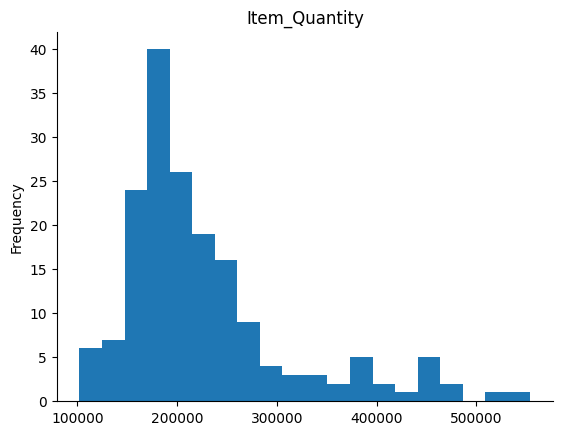

In [77]:
from matplotlib import pyplot as plt
item_summary['Item_Quantity'].plot(kind='hist', bins=20, title='Item_Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [78]:
data=pd.merge(data,item_summary,on="Item_ID",suffixes=("_X","_avg"))
data.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price_X,Item_Quantity_X,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_brackets,competitor_price_brackets,competition_sales_amt,Price_avg,Item_Quantity_avg
0,0,2019-03-18,store_459,item_526,134.49,435,4716.74,11272.59,206.44,NaN,NaN,NaN,101-150,201-250,89801.40,132.032911,248960
1,1,2019-03-18,store_459,item_526,134.49,435,4716.74,11272.59,158.01,0.0,0.0,NaN,101-150,151-200,68734.35,132.032911,248960
2,2,2019-03-18,store_459,item_526,134.49,435,4716.74,11272.59,278.03,0.0,0.0,NaN,101-150,251-300,120943.05,132.032911,248960
3,3,2019-03-18,store_459,item_526,134.49,435,4716.74,11272.59,222.66,0.0,0.0,NaN,101-150,201-250,96857.10,132.032911,248960
4,4,2019-03-18,store_459,item_526,134.49,435,4716.74,11272.59,195.32,0.0,0.0,NaN,101-150,151-200,84964.20,132.032911,248960


In [79]:
data = data.loc[:, ~data.columns.duplicated()]


In [80]:
data['Segments'] = pd.cut(data['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

data["Segments"]



,Segments
0,Medium
1,Medium
2,Medium
3,Medium
4,Medium
...,...
99995,Medium
99996,Medium
99997,Medium
99998,Medium


In [81]:
segments=data["Segments"].unique()
segments

['Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [83]:
elasticity_data = []

for segment in segments:
    segment_data = data[data['Segments'] == segment]
    segment_data['price_change'] = segment_data['Price_avg'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity_X'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

<ipython-input-83-61651c4aea1a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-61651c4aea1a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-61651c4aea1a>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-61651c4

,segment,avg_elasticity
0,Medium,-0.771115
1,High,0.045697


In [89]:
# create a copy of the dataset for simulation
dynamic_pricing_data = data.copy()

# apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['Segments'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price_X'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['Segments'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price_X'] * 0.90

# calculate new sales amounts based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity_X']

# compare total sales amount between existing and dynamic pricing
total_sales_existing = data['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

# compare total quantity sold between existing and dynamic pricing
total_qty_existing = data['Item_Quantity_X'].sum()
total_qty_dynamic = dynamic_pricing_data['Item_Quantity_X'].sum()  # quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.139687e+09,6.249350e+09
1,Total Quantity Sold,3.996113e+07,3.996113e+07


In [91]:
data['dynamic_price'] = dynamic_pricing_data['dynamic_price']
data['dynamic_price']

,dynamic_price
0,141.2145
1,141.2145
2,141.2145
3,141.2145
4,141.2145
...,...
99995,98.8050
99996,98.8050
99997,98.8050
99998,98.8050
